# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.661  1  1.200 0.275 0.006   
                             age        0.021  1  0.039 0.844 0.000   
                             Kiel       1.686  1  3.060 0.082 0.016   
                             Magdeburg  4.440  1  8.060 0.005 0.040   
                             Sweden     7.861  1 14.272 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.203  1  0.216 0.643 0.001   
                             age        1.222  1  1.301 0.255 0.007   
                             Kiel       0.044  1  0.047 0.828 0.000   
                             Magdeburg  1.891  1  2.014 0.158 0.010   
                             Sweden    17.241  1 18.360 0.000 0.088   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.561  0.436    False  
                             age               0.074  0.908    False  
                             Kiel              1.087  0.179    False  
                             Magdeburg         2.300  0.019     True  
                             Sweden            3.675  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.192  0.766    False  
                             age               0.593  0.414    False  
                             Kiel              0.082  0.897    False  
                             Magdeburg         0.803  0.292    False  
                             Sweden            4.538  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.815  1  4.746 0.031 0.024   
                             age        0.002  1  0.013 0.910 0.000   
                             Kiel       0.422  1  2.457 0.119 0.013   
                             Magdeburg  1.063  1  6.190 0.014 0.031   
                             Sweden     2.614  1 15.213 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.043  1  0.591 0.443 0.003   
                             age        2.490  1  1.411 0.236 0.007   
                             Kiel       9.630  1  5.458 0.021 0.028   
                             Magdeburg 15.488  1  8.778 0.003 0.044   
                             Sweden     0.004  1  0.002 0.964 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.514  0.077    False  
                             age               0.041  0.943    False  
                             Kiel              0.926  0.226    False  
                             Magdeburg         1.863  0.040     True  
                             Sweden            3.876  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.354  0.589    False  
                             age               0.627  0.379    False  
                             Kiel              1.688  0.056    False  
                             Magdeburg         2.464  0.013     True  
                             Sweden            0.016  0.978    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.275         0.561  0.436    False   
                             age       0.844         0.074  0.908    False   
                             Kiel      0.082         1.087  0.179    False   
                             Magdeburg 0.005         2.300  0.019     True   
                             Sweden    0.000         3.675  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.643         0.192  0.766    False   
                             age       0.255         0.593  0.414    False   
                             Kiel      0.828         0.082  0.897    False   
                             Magdeburg 0.158         0.803  0.292    False   
                             Sweden    0.000         4.538  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.031         1.514  0.077    False  
                             age       0.910         0.041  0.943    False  
                             Kiel      0.119         0.926  0.226    False  
                             Magdeburg 0.014         1.863  0.040     True  
                             Sweden    0.000         3.876  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.443         0.354  0.589    False  
                             age       0.236         0.627  0.379    False  
                             Kiel      0.021         1.688  0.056    False  
                             Magdeburg 0.003         2.464  0.013     True  
                             Sweden    0.964         0.016  0.978    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.487     0.337     0.246         2.743     0.313
std       0.303         5.387     0.330     0.297         5.180     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.339     0.014     0.002         0.357     0.008
50%       0.120         0.921     0.240     0.093         1.029     0.187
75%       0.458         2.445     0.610     0.439         2.704     0.586
max       0.999       147.255     0.999     1.000        85.542     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.275         0.561   
A0A024R0T9;K7ER74;P02655                           AD     0.077         1.114   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.193         0.714   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.576         0.240   
A0A075B6H7                                         AD     0.223         0.651   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.080         1.096   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.128         0.892   
S4R3U6                                             AD     0.643         0.192   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.436    False   
A0A024R0T9;K7ER74;P02655                           AD      0.171    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.340    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.711    False   
A0A075B6H7                                         AD      0.375    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.176    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.252    False   
S4R3U6                                             AD      0.766    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.031         1.514   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.530   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.251         0.601   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.298         0.525   
A0A075B6H7                                         AD     0.187         0.727   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.060         1.222   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.824         0.084   
S4R3U6                                             AD     0.443         0.354   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.077    False  
A0A024R0T9;K7ER74;P02655                           AD      0.075    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.398    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.450    False  
A0A075B6H7                                         AD      0.320    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.405     0.334     0.244         1.495     0.318
std       0.285         1.622     0.312     0.285         1.758     0.311
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.364     0.040     0.010         0.372     0.030
50%       0.128         0.892     0.252     0.110         0.960     0.212
75%       0.433         1.912     0.590     0.424         2.019     0.572
max       0.999        20.571     0.999     1.000        22.347     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1034,998


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.275         0.561  0.436   
A0A024R0T9;K7ER74;P02655                           0.077         1.114  0.171   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.193         0.714  0.340   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.576         0.240  0.711   
A0A075B6H7                                         0.223         0.651  0.375   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.080         1.096  0.176   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.128         0.892  0.252   
S4R3U6                                             0.643         0.192  0.766   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.031   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.251   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.298   
A0A075B6H7                                            False 0.187   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.060   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.824   
S4R3U6                                                False 0.443   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.514  0.077   
A0A024R0T9;K7ER74;P02655                                   1.530  0.075   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.601  0.398   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.525  0.450   
A0A075B6H7                                                 0.727  0.320   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.222  0.131   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.084  0.887   
S4R3U6                                                     0.354  0.589   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    964
PI (yes) - QRILC (yes)   353
PI (no)  - QRILC (yes)    70
PI (yes) - QRILC (no)     34
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                               QRILC  \
                         p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                       
A0A075B6I0               0.030         1.518  0.082    False 0.002   
A0A075B6J9               0.021         1.670  0.062    False 0.008   
A0A075B6S5               0.143         0.845  0.272    False 0.016   
A0A087WWT2;Q9NPD7        0.023         1.635  0.066    False 0.007   
A0A087WXB8;Q9Y274        0.010         2.013  0.033     True 0.145   
...                        ...           ...    ...      ...   ...   
Q9NUQ9                   0.049         1.309  0.120    False 0.007   
Q9NY15                   0.013         1.900  0.040     True 0.087   
Q9NYX4                   0.092         1.038  0.195    False 0.008   
Q9NZ94;Q9NZ94-2;Q9NZ94-3 0.186         0.731  0.331    False 0.018   
Q9UQ52                   0.146         0.837  0.275    False 0.005   

                                                            data  
                         -Log10 pvalue qvalue rejected frequency  
protein groups                                                    
A0A075B6I0                       2.701  0.008     True       194  
A0A075B6J9                       2.100  0.026     True       156  
A0A075B6S5                       1.808  0.045     True       129  
A0A087WWT2;Q9NPD7                2.168  0.022     True       193  
A0A087WXB8;Q9Y274                0.840  0.262    False        89  
...                                ...    ...      ...       ...  
Q9NUQ9                           2.128  0.024     True       114  
Q9NY15                           1.062  0.176    False       135  
Q9NYX4                           2.085  0.026     True       195  
Q9NZ94;Q9NZ94-2;Q9NZ94-3         1.753  0.050     True       115  
Q9UQ52                           2.307  0.017     True       188  

[104 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.436,0.077,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.171,0.075,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.340,0.398,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.711,0.450,196,PI (no) - QRILC (no)
A0A075B6H7,0.375,0.320,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.176,0.131,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A2RU67,0.890,0.031,53,PI (no) - QRILC (yes),0.859
J3KSJ8;Q9UD71;Q9UD71-2,0.608,0.018,51,PI (no) - QRILC (yes),0.589
Q08174-2,0.540,0.021,194,PI (no) - QRILC (yes),0.518
F6SYF8;Q9UBP4,0.459,0.005,196,PI (no) - QRILC (yes),0.454
P63167;Q96FJ2,0.447,0.007,137,PI (no) - QRILC (yes),0.440
...,...,...,...,...,...
P16519;P16519-3,0.047,0.057,115,PI (yes) - QRILC (no),0.009
P09211,0.056,0.047,169,PI (no) - QRILC (yes),0.009
Q16706,0.055,0.047,195,PI (no) - QRILC (yes),0.007


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


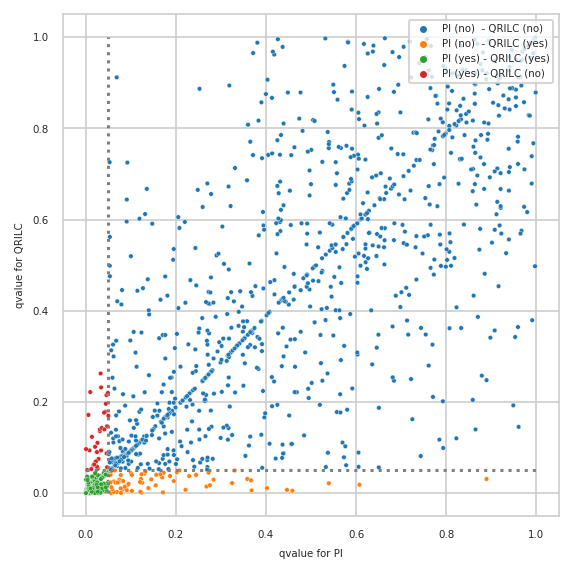

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


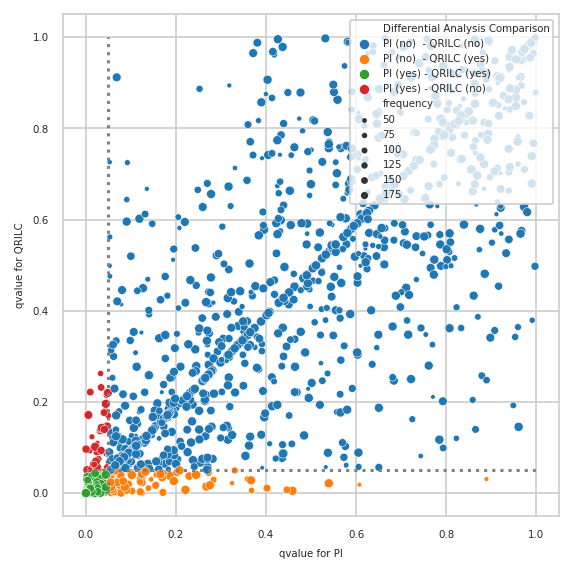

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out